In [1]:
import cv2
import os
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

In [2]:
recognizer = cv2.face_LBPHFaceRecognizer.create()
recognizer.read("C:\Users\evapr\Desktop\ODL\Final_Year_Project\ATM-Security-Face-Recognition-OTP\Security - Copy (2)\login-verification-master\TrainingImageLabel\\Trainner.yml")

In [3]:
def getImagesAndLabels(path):
    imagePaths = [os.path.join(path, f) for f in os.listdir(path)]
    faces = []
    Ids = []
    for imagePath in imagePaths:
        pilImage = Image.open(imagePath).convert('L')
        imageNp = np.array(pilImage, 'uint8')
        Id = int(os.path.split(imagePath)[-1].split(".")[1])
        faces.append(imageNp)
        Ids.append(Id)
    return faces, Ids

In [4]:
X, y = getImagesAndLabels("C:\Users\evapr\Desktop\ODL\Final_Year_Project\ATM-Security-Face-Recognition-OTP\Security - Copy (2)\login-verification-master\TrainingImageLabel")

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
recognizer.train(X_train, np.array(y_train))

In [7]:
y_pred = []
for img in X_test:
    label, _ = recognizer.predict(img)
    y_pred.append(label)

1711 40.721726888889755
Unable to Recognize Face
1711 48.162991988851566
Unable to Recognize Face
1711 47.96918133919383
Unable to Recognize Face
1711 48.1358492080635
Unable to Recognize Face
1711 49.4556624773214
Unable to Recognize Face
1711 48.56588058607369
Unable to Recognize Face
1711 48.23804435807616
Unable to Recognize Face
1711 48.58740484432397
Unable to Recognize Face
1711 48.69094855226683
Unable to Recognize Face
1711 49.287411193761876
Unable to Recognize Face
1711 48.65576232637655
Unable to Recognize Face
1711 48.37025630539341
Unable to Recognize Face
1711 48.245437153789986
Unable to Recognize Face
1711 48.54555302852459
Unable to Recognize Face
1711 47.64547740224136
Unable to Recognize Face
1711 47.83595351872459
Unable to Recognize Face
1711 48.06302676877652
Unable to Recognize Face
1711 47.99452346953029
Unable to Recognize Face
1711 48.2133785718326
Unable to Recognize Face
1711 47.34728573030159
Unable to Recognize Face
1711 47.19129969298641
Unable to Recogn

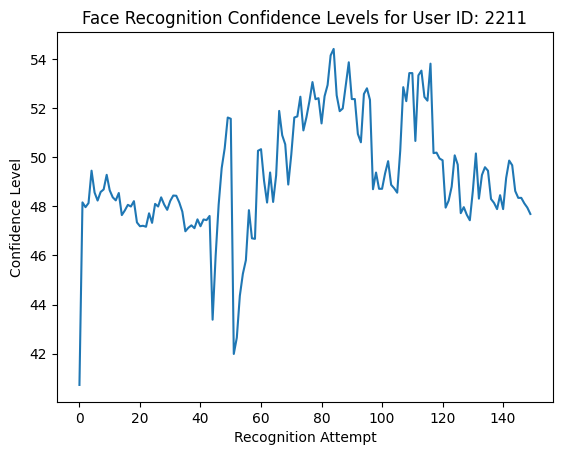

In [12]:
def TrackImages(UserId, confidence_levels):
    recognizer = cv2.face_LBPHFaceRecognizer.create()
    recognizer.read("C:\\Users\\evapr\\Desktop\\ODL\\Final_Year_Project\\ATM-Security-Face-Recognition-OTP\\Security - Copy (2)\\login-verification-master\\TrainingImageLabel\\Trainner.yml")
    harcascadePath = "C:\\Users\\evapr\\Desktop\\ODL\\Final_Year_Project\\ATM-Security-Face-Recognition-OTP\\Security - Copy (2)\\login-verification-master\\haarcascade_frontalface_default.xml"
    faceCascade = cv2.CascadeClassifier(harcascadePath)
    df = pd.read_csv("C:\\Users\\evapr\\Desktop\\ODL\\Final_Year_Project\\ATM-Security-Face-Recognition-OTP\\Security - Copy (2)\\login-verification-master\\Details\\Details.csv")
    cam = cv2.VideoCapture(0)
    font = cv2.FONT_HERSHEY_SIMPLEX

    run_count = 0
    run = True

    while run:
        ret, im = cam.read()
        gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
        faces = faceCascade.detectMultiScale(gray, 1.2, 5)
        for (x, y, w, h) in faces:
            cv2.rectangle(im, (x, y), (x + w, y + h), (225, 0, 0), 2)
            Id, conf = recognizer.predict(gray[y:y + h, x:x + w])
            confidence_levels.append(conf)  # Collect confidence values
            print(Id,conf)
            if conf < 50:
                aa = df.loc[df['Id'] == Id]['Name'].values
                aa_str = "-".join(aa.astype(str))
                tt = str(Id) + "-" + aa_str
                if str(Id) == UserId:
                    print("Face Recognized Successfully")
                    run = False
                else:
                    print("Unable to Recognize Face")
                    
            else:
                Id = 'Unknown'
                tt = str(Id)
            cv2.putText(im, str(tt), (x, y + h), font, 1, (255, 255, 255), 2)
        run_count += 1
        cv2.imshow('im', im)

        if (cv2.waitKey(1) == ord('q') or run_count == 150):
            print("Unable to Recognize Face")
            break

    cam.release()
    cv2.destroyAllWindows()

# Create an empty list to collect confidence levels
confidence_levels = []

# Call the function with the desired UserID and confidence_levels list
TrackImages('2211', confidence_levels)

# Plot the confidence levels
plt.plot(confidence_levels)
plt.xlabel('Recognition Attempt')
plt.ylabel('Confidence Level')
plt.title(f'Face Recognition Confidence Levels for User ID: 2211')
plt.show()


In [50]:
BASE_DIR = r'C:\\Users\\evapr\\Desktop\\ODL\\Final_Year_Project\\ATM-Security-Face-Recognition-OTP\\Security - Copy (2)'
image_dir = os.path.join(BASE_DIR, 'login-verification-master', 'TrainingImage')

plot_images_dir = os.path.join(BASE_DIR, 'plot_images')
if not os.path.exists(plot_images_dir):
    os.makedirs(plot_images_dir)


In [51]:
def Binary_pattern(im):
    img = np.zeros_like(im)
    n = 3
    for i in range(0, im.shape[0] - n):
        for j in range(0, im.shape[1] - n):
            x = im[i:i + n, j:j + n]
            center = x[1, 1]
            img1 = (x >= center) * 1.0
            img1_vector = img1.T.flatten()
            img1_vector = np.delete(img1_vector, 4)
            digit = np.where(img1_vector)[0]
            if len(digit) >= 1:
                num = np.sum(2**digit)
            else:
                num = 0
            img[i + 1, j + 1] = num
    return img


In [52]:
def analyze_LBP_histograms(lbp_histogram):
    mean_lbp = np.mean(lbp_histogram)
    variance_lbp = np.var(lbp_histogram)
    entropy_lbp = -np.sum(np.multiply(lbp_histogram, np.log2(lbp_histogram + np.finfo(float).eps))
                         )

    return mean_lbp, variance_lbp, entropy_lbp

In [53]:
sampleNum = 0
for root, dirs, files in os.walk(image_dir):
    for file in files:
        if file.endswith("png") or file.endswith("jpg"):
            sampleNum += 1
            path = os.path.join(root, file)
            img1 = cv2.imread(path)
            gray_img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
            imgLBP_1 = Binary_pattern(gray_img1)
            vectorLBP_1 = imgLBP_1.flatten()
            fig_1 = plt.figure(figsize=(20, 8))
            ax_1 = fig_1.add_subplot(1, 3, 1)
            ax_1.imshow(gray_img1)
            ax_1.set_title("Gray Scale")
            ax_1 = fig_1.add_subplot(1, 3, 2)
            ax_1.imshow(imgLBP_1, cmap="gray")
            ax_1.set_title("LBP Converted Image")
            ax_1 = fig_1.add_subplot(1, 3, 3)
            freq, lbp, _ = ax_1.hist(vectorLBP_1, bins=2**8)
            ax_1.set_ylim(0, 15000)
            lbp = lbp[:-1]

            # Print the LBP values when frequencies are high
            largeTF = freq > 1000
            for x, fr in zip(lbp[largeTF], freq[largeTF]):
                ax_1.text(x, fr, "{:6.0f}".format(x), color="magenta")
            ax_1.set_title("LBP Histogram")
            
             # Analyze LBP Histogram and print statistics
            mean_lbp, variance_lbp, entropy_lbp = analyze_LBP_histograms(lbp)

            print("Mean LBP: {:.2f}".format(mean_lbp))
            print("Variance LBP: {:.2f}".format(variance_lbp))
            print("Entropy LBP: {:.2f}".format(entropy_lbp))
            print("Saving Plot: " + str(sampleNum) + "......")
            
            fig_1.savefig(BASE_DIR + '\plot_images\hist_plot.' + str(sampleNum) + '.png')
            print("Closing figure: " + str(sampleNum))
            plt.close(fig_1)


Mean LBP: 127.00
Variance LBP: 5418.67
Entropy LBP: -236372.65
Saving Plot: 1......
Closing figure: 1
Mean LBP: 127.00
Variance LBP: 5418.67
Entropy LBP: -236372.65
Saving Plot: 2......
Closing figure: 2
Mean LBP: 127.00
Variance LBP: 5418.67
Entropy LBP: -236372.65
Saving Plot: 3......
Closing figure: 3
Mean LBP: 127.00
Variance LBP: 5418.67
Entropy LBP: -236372.65
Saving Plot: 4......
Closing figure: 4
Mean LBP: 127.00
Variance LBP: 5418.67
Entropy LBP: -236372.65
Saving Plot: 5......
Closing figure: 5
Mean LBP: 127.00
Variance LBP: 5418.67
Entropy LBP: -236372.65
Saving Plot: 6......
Closing figure: 6
Mean LBP: 127.00
Variance LBP: 5418.67
Entropy LBP: -236372.65
Saving Plot: 7......
Closing figure: 7
Mean LBP: 127.00
Variance LBP: 5418.67
Entropy LBP: -236372.65
Saving Plot: 8......
Closing figure: 8
Mean LBP: 127.00
Variance LBP: 5418.67
Entropy LBP: -236372.65
Saving Plot: 9......
Closing figure: 9
Mean LBP: 127.00
Variance LBP: 5418.67
Entropy LBP: -236372.65
Saving Plot: 10....

Mean LBP: 127.00
Variance LBP: 5418.67
Entropy LBP: -236372.65
Saving Plot: 80......
Closing figure: 80
Mean LBP: 127.00
Variance LBP: 5418.67
Entropy LBP: -236372.65
Saving Plot: 81......
Closing figure: 81
Mean LBP: 127.00
Variance LBP: 5418.67
Entropy LBP: -236372.65
Saving Plot: 82......
Closing figure: 82
Mean LBP: 127.00
Variance LBP: 5418.67
Entropy LBP: -236372.65
Saving Plot: 83......
Closing figure: 83
Mean LBP: 127.00
Variance LBP: 5418.67
Entropy LBP: -236372.65
Saving Plot: 84......
Closing figure: 84
Mean LBP: 127.00
Variance LBP: 5418.67
Entropy LBP: -236372.65
Saving Plot: 85......
Closing figure: 85
Mean LBP: 127.00
Variance LBP: 5418.67
Entropy LBP: -236372.65
Saving Plot: 86......
Closing figure: 86
Mean LBP: 127.00
Variance LBP: 5418.67
Entropy LBP: -236372.65
Saving Plot: 87......
Closing figure: 87
Mean LBP: 127.00
Variance LBP: 5418.67
Entropy LBP: -236372.65
Saving Plot: 88......
Closing figure: 88
Mean LBP: 127.00
Variance LBP: 5418.67
Entropy LBP: -236372.65
S

Closing figure: 157
Mean LBP: 127.00
Variance LBP: 5418.67
Entropy LBP: -236372.65
Saving Plot: 158......
Closing figure: 158
Mean LBP: 127.00
Variance LBP: 5418.67
Entropy LBP: -236372.65
Saving Plot: 159......
Closing figure: 159
Mean LBP: 127.00
Variance LBP: 5418.67
Entropy LBP: -236372.65
Saving Plot: 160......
Closing figure: 160
Mean LBP: 127.00
Variance LBP: 5418.67
Entropy LBP: -236372.65
Saving Plot: 161......
Closing figure: 161
Mean LBP: 127.00
Variance LBP: 5418.67
Entropy LBP: -236372.65
Saving Plot: 162......
Closing figure: 162
Mean LBP: 127.00
Variance LBP: 5418.67
Entropy LBP: -236372.65
Saving Plot: 163......
Closing figure: 163
Mean LBP: 127.00
Variance LBP: 5418.67
Entropy LBP: -236372.65
Saving Plot: 164......
Closing figure: 164
Mean LBP: 127.00
Variance LBP: 5418.67
Entropy LBP: -236372.65
Saving Plot: 165......
Closing figure: 165
Mean LBP: 127.00
Variance LBP: 5418.67
Entropy LBP: -236372.65
Saving Plot: 166......
Closing figure: 166
Mean LBP: 127.00
Variance 

In [48]:
def analyze_LBP_histograms(lbp_histogram):
    mean_lbp = np.mean(lbp_histogram)
    variance_lbp = np.var(lbp_histogram)
    entropy_lbp = -np.sum(np.multiply(lbp_histogram, np.log2(lbp_histogram + np.finfo(float).eps))
                         )

    return mean_lbp, variance_lbp, entropy_lbp

In [49]:
# Analyze LBP Histogram and print statistics
mean_lbp, variance_lbp, entropy_lbp = analyze_LBP_histograms(lbp)

print("Mean LBP: {:.2f}".format(mean_lbp))
print("Variance LBP: {:.2f}".format(variance_lbp))
print("Entropy LBP: {:.2f}".format(entropy_lbp))

Mean LBP: 127.00
Variance LBP: 5418.67
Entropy LBP: -236372.65


1711 46.123542372098925
Face Recognized Successfully
1711 43.90181952876573
Face Recognized Successfully
1711 43.90181952876573
Face Recognized Successfully
1711 45.36218024328657
Face Recognized Successfully
1711 45.36218024328657
Face Recognized Successfully
1711 46.0539257993286
Face Recognized Successfully
1711 51.28400951504581
1711 51.28400951504581
1711 47.97378664632251
Face Recognized Successfully
1711 47.97378664632251
Face Recognized Successfully
1711 46.996833835944855
Face Recognized Successfully
1711 46.996833835944855
Face Recognized Successfully
1711 47.379859180552366
Face Recognized Successfully
1711 46.51382947077664
Face Recognized Successfully
1711 46.51382947077664
Face Recognized Successfully
1711 46.94488910886765
Face Recognized Successfully
1711 46.94488910886765
Face Recognized Successfully
1711 46.38716268399918
Face Recognized Successfully
1711 46.38716268399918
Face Recognized Successfully
1711 46.13679296912384
Face Recognized Successfully
1711 46.8751384

1711 47.516564451993816
Face Recognized Successfully
1711 47.786665788502155
Face Recognized Successfully
1711 47.786665788502155
Face Recognized Successfully
1711 45.812422065989466
Face Recognized Successfully
1711 47.33596895047205
Face Recognized Successfully
1711 47.33596895047205
Face Recognized Successfully
1711 47.48808209645503
Face Recognized Successfully
1711 48.17573905291392
Face Recognized Successfully
1711 48.17573905291392
Face Recognized Successfully
1711 50.094267540765486
1711 49.981104391584324
Face Recognized Successfully
1711 49.981104391584324
Face Recognized Successfully
1711 48.476133882930434
Face Recognized Successfully
1711 48.88993452507588
Face Recognized Successfully
1711 48.88993452507588
Face Recognized Successfully
1711 49.51685696597709
Face Recognized Successfully
1711 49.51685696597709
Face Recognized Successfully
1711 49.356480230932775
Face Recognized Successfully
1711 49.084425675942015
Face Recognized Successfully
1711 49.084425675942015
Face Re

1711 40.452888386147556
Face Recognized Successfully
1711 41.47340301422397
Face Recognized Successfully
1711 42.50423207322488
Face Recognized Successfully
1711 42.50423207322488
Face Recognized Successfully
1711 44.46027045526768
Face Recognized Successfully
1711 44.58085061448857
Face Recognized Successfully
1711 44.58085061448857
Face Recognized Successfully
1711 45.510696266118025
Face Recognized Successfully
1711 45.510696266118025
Face Recognized Successfully
1711 45.57043663350008
Face Recognized Successfully
1711 45.84216860104167
Face Recognized Successfully
1711 45.84216860104167
Face Recognized Successfully
1711 48.31461938052863
Face Recognized Successfully
1711 48.15793175160302
Face Recognized Successfully
1711 48.15793175160302
Face Recognized Successfully
1711 46.35766897248041
Face Recognized Successfully
1711 45.357100004613514
Face Recognized Successfully
1711 45.357100004613514
Face Recognized Successfully
1711 45.30557894946674
Face Recognized Successfully
1711 44

1711 44.80197178711952
Face Recognized Successfully
1711 45.0571505237649
Face Recognized Successfully
1711 45.0571505237649
Face Recognized Successfully
1711 45.73577015479305
Face Recognized Successfully
1711 45.73577015479305
Face Recognized Successfully
1711 44.51746999063899
Face Recognized Successfully
1711 45.04078569419192
Face Recognized Successfully
1711 45.04078569419192
Face Recognized Successfully
1711 44.65081654905801
Face Recognized Successfully
1711 44.65081654905801
Face Recognized Successfully
1711 44.0047631177536
Face Recognized Successfully
1711 44.0047631177536
Face Recognized Successfully
1711 43.575813760310524
Face Recognized Successfully
1711 44.178795788839565
Face Recognized Successfully
1711 44.178795788839565
Face Recognized Successfully
1711 46.00598897812601
Face Recognized Successfully
1711 46.00598897812601
Face Recognized Successfully
1711 46.191490536394895
Face Recognized Successfully
1711 46.191490536394895
Face Recognized Successfully
1711 44.909

1711 48.86680917576171
Face Recognized Successfully
1711 48.86680917576171
Face Recognized Successfully
1711 47.043131204459385
Face Recognized Successfully
1711 47.043131204459385
Face Recognized Successfully
1711 48.05200367884225
Face Recognized Successfully
1711 48.05200367884225
Face Recognized Successfully
1711 47.34122630110569
Face Recognized Successfully
1711 45.74343761876834
Face Recognized Successfully
1711 45.74343761876834
Face Recognized Successfully
1711 46.946967868537556
Face Recognized Successfully
1711 46.946967868537556
Face Recognized Successfully
1711 46.561339127479556
Face Recognized Successfully
1711 46.561339127479556
Face Recognized Successfully
1711 45.20216379708113
Face Recognized Successfully
1711 44.87012847297819
Face Recognized Successfully
1711 44.87012847297819
Face Recognized Successfully
1711 46.363036846245876
Face Recognized Successfully
1711 46.363036846245876
Face Recognized Successfully
1711 44.85696159942434
Face Recognized Successfully
1711

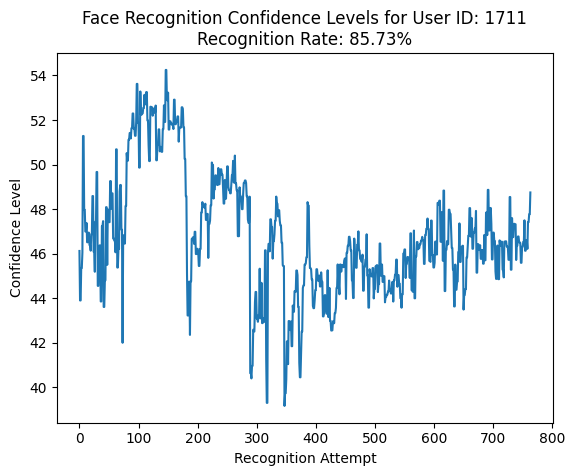

In [20]:
import cv2
import pandas as pd
import matplotlib.pyplot as plt
import time

def TrackImages(UserId, confidence_levels, runtime_seconds=40):
    recognizer = cv2.face_LBPHFaceRecognizer.create()
    recognizer.read("C:\\Users\\evapr\\Desktop\\ODL\\Final_Year_Project\\ATM-Security-Face-Recognition-OTP\\Security - Copy (2)\\login-verification-master\\TrainingImageLabel\\Trainner.yml")
    harcascadePath = "C:\\Users\\evapr\\Desktop\ODL\\Final_Year_Project\\ATM-Security-Face-Recognition-OTP\\Security - Copy (2)\\login-verification-master\\haarcascade_frontalface_default.xml"
    faceCascade = cv2.CascadeClassifier(harcascadePath)
    df = pd.read_csv("C:\\Users\\evapr\\Desktop\\ODL\\Final_Year_Project\\ATM-Security-Face-Recognition-OTP\\Security - Copy (2)\\login-verification-master\\Details\\Details.csv")
    cam = cv2.VideoCapture(0)
    font = cv2.FONT_HERSHEY_SIMPLEX

    start_time = time.time()
    successful_recognitions = 0
    total_recognitions = 0

    while (time.time() - start_time) < runtime_seconds:
        ret, im = cam.read()
        gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
        faces = faceCascade.detectMultiScale(gray, 1.2, 5)
        for (x, y, w, h) in faces:
            cv2.rectangle(im, (x, y), (x + w, y + h), (225, 0, 0), 2)
            Id, conf = recognizer.predict(gray[y:y + h, x:x + w])
            confidence_levels.append(conf)
            print(Id, conf)
            total_recognitions += 1
            if conf < 50:
                aa = df.loc[df['Id'] == Id]['Name'].values
                aa_str = "-".join(aa.astype(str))
                tt = str(Id) + "-" + aa_str
                if str(Id) == UserId:
                    successful_recognitions += 1
                    print("Face Recognized Successfully")
                else:
                    print("Unable to Recognize Face")
            else:
                Id = 'Unknown'
                tt = str(Id)
            cv2.putText(im, str(tt), (x, y + h), font, 1, (255, 255, 255), 2)
        cv2.imshow('im', im)
        cv2.waitKey(1)

    cam.release()
    cv2.destroyAllWindows()

    # Calculate the correct recognition rate
    recognition_rate = (successful_recognitions / total_recognitions) * 100

    return recognition_rate

# Create an empty list to collect confidence levels
confidence_levels = []

# Call the function with the desired UserID, confidence_levels list, and runtime in seconds
recognition_rate = TrackImages('1711', confidence_levels, runtime_seconds=40)

# Plot the confidence levels and the recognition rate
plt.plot(confidence_levels)
plt.xlabel('Recognition Attempt')
plt.ylabel('Confidence Level')
plt.title(f'Face Recognition Confidence Levels for User ID: 1711\nRecognition Rate: {recognition_rate:.2f}%')
plt.show()
